<h1 align='center'><b><font color='blue'>Customer churn prediction</font></b></h1>


![churn_overview](https://github.com/dangyenlinhh/churn_rate_prediction/assets/161103801/651bb434-ff75-4d49-b8ea-7e3c4d8ffc34)

## Contents
1. [Problem Statement](#1.-Problem-Statement)
2. [Load dataset](#2.-Load-dataset)
3. [EDA (Exploratory Data Analysis)](#3.-EDA-(Exploratory-Data-Analysis))

    3.1 [Data Visualization](#3.1-Data-Visualization)
    
    3.2 [Data Preprocessing](#3.2-Data-Preprocessing)
    
    3.3 [Feature Engineering](#3.3-Feature-Engineering)
    
    
    
4. [Apply machine learning model](#4.-Apply-machine_learing_model)

    4.1 [Train-test split](#4.1.-Train-test-split)
    
    4.2 [Build SK-learn model](#4.2-Build-SK-learn-model)
    
    
    * [DecisionTree model](#DecisionTree-model)
    * [RandomForest model](#RandomForest-model)
    * [Xgboost model](#Xgboost-model)
    * [Catboost model](#Catboost-model)
    
    4.3 [Handle label imbalances](#4.3-Handle-label-imbalances)
    
    4.4 [Feature Selection using Random Forest ](#4.4-Feature-Selection-using-Random-Forest )

## 1. Problem Statement

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

    * User demographic information
    * Browsing behavior
    * Historical purchase data among other information
    
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

Recognizing the significance of customer churn, as it's far more cost-effective to retain existing customers than to acquire new ones, this project aims to develop a robust predictive model. This model will effectively pinpoint customers at high risk of churn based on their historical interactions and distinctive characteristics, helping companies proactively address churn and foster long-term customer relationships.

## 2. Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

df = pd.read_csv("/kaggle/input/homework-churn-rate-prediction/HomeWork-churn_rate_prediction.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.shape

(36992, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [6]:
df.nunique()

customer_id                     36992
Name                            36992
age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    6
dtype: int64

In [7]:
df.select_dtypes(include=[np.number]).head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.75,2
1,32,16,306.34,12838.38,NaN,1
2,44,14,516.16,21027.00,500.69,5
3,37,11,53.27,25239.56,567.66,5
4,31,20,113.13,24483.66,663.06,5


In [8]:
df.select_dtypes(include =["object"]).head()

,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe4300490044003600300030003800,Pattie Morrisey,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,Yes,Yes,No,Not Applicable,Products always in Stock
1,fffe43004900440032003100300035003700,Traci Peery,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10.0,Yes,No,Yes,Solved,Quality Customer Care
2,fffe4300490044003100390032003600,Merideth Mcmeen,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website
3,fffe43004900440036003000330031003600,Eufemia Cardwell,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,6.0,No,Yes,Yes,Unsolved,Poor Website
4,fffe43004900440031003900350030003600,Meghan Kosak,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,16.0,No,Yes,Yes,Solved,Poor Website


#### The customer_id ,Name,security_no,referral_id columns don't have a direct impact on predicting whether a customer will leave or stay. So we're going to remove these two columns from the dataset

In [9]:
df = df.drop(["customer_id", "Name","security_no","referral_id"], axis = 1)

## 3. EDA (Exploratory Data Analysis)

### 3.1 Data Visualization

<AxesSubplot: xlabel='churn_risk_score', ylabel='count'>

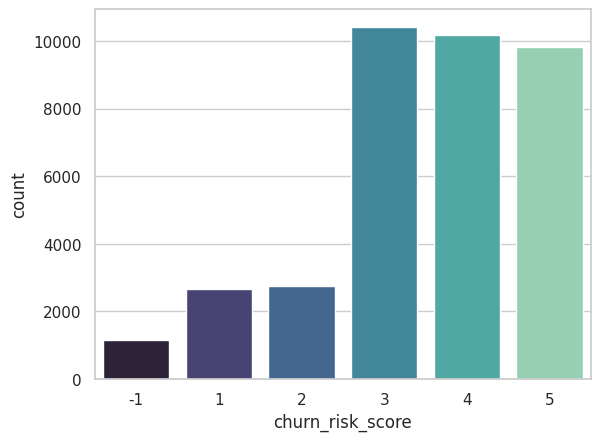

In [10]:
#Target column statistics
sns.set_theme(style="whitegrid")
sns.countplot(x='churn_risk_score',data=df,palette='mako')

The values assigned are between 1 and 5. So I will replace the value -1 with 1.

In [11]:
df['churn_risk_score'] = df['churn_risk_score'].replace(-1,1)

In [12]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numeric_cols = [ feature for feature in df.columns if df[feature].dtype != "O"]


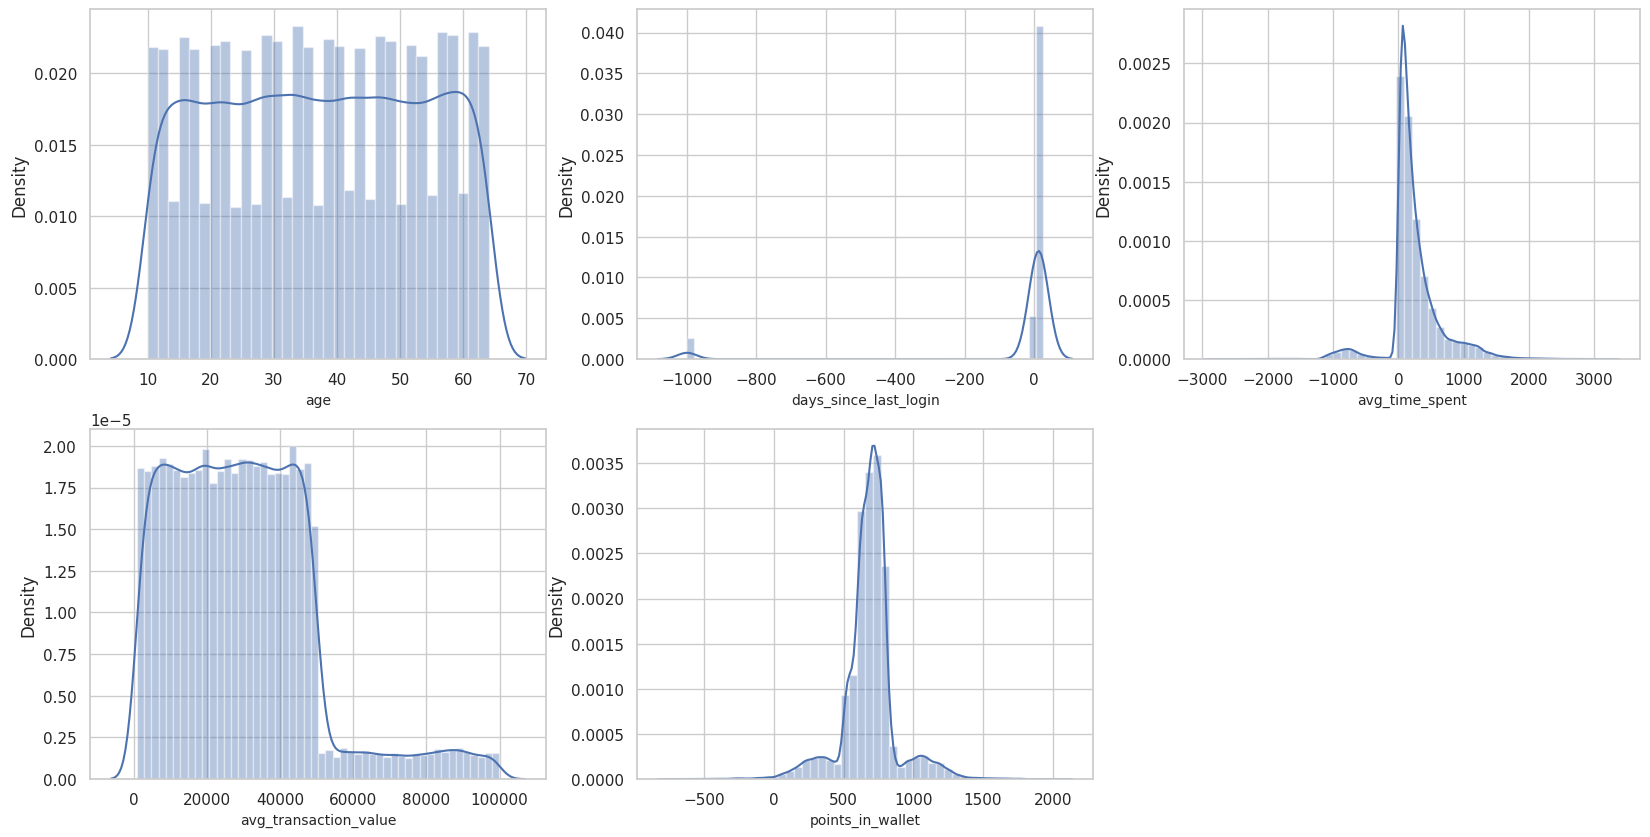

In [13]:
df_num=df.select_dtypes(include=[np.number]) 
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20,10))

for index, column in zip(df_num.columns,ax.flatten()):
    z = sns.distplot(x = df_num[index] , ax=column) 
    z.set_xlabel(index, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

#### Observation:

* The feature "days_since_last_login" , "avg_time_spent",  and "points_in_wallet" exist values <0.
* This is not valid, so in preprocessing we need to handle them.

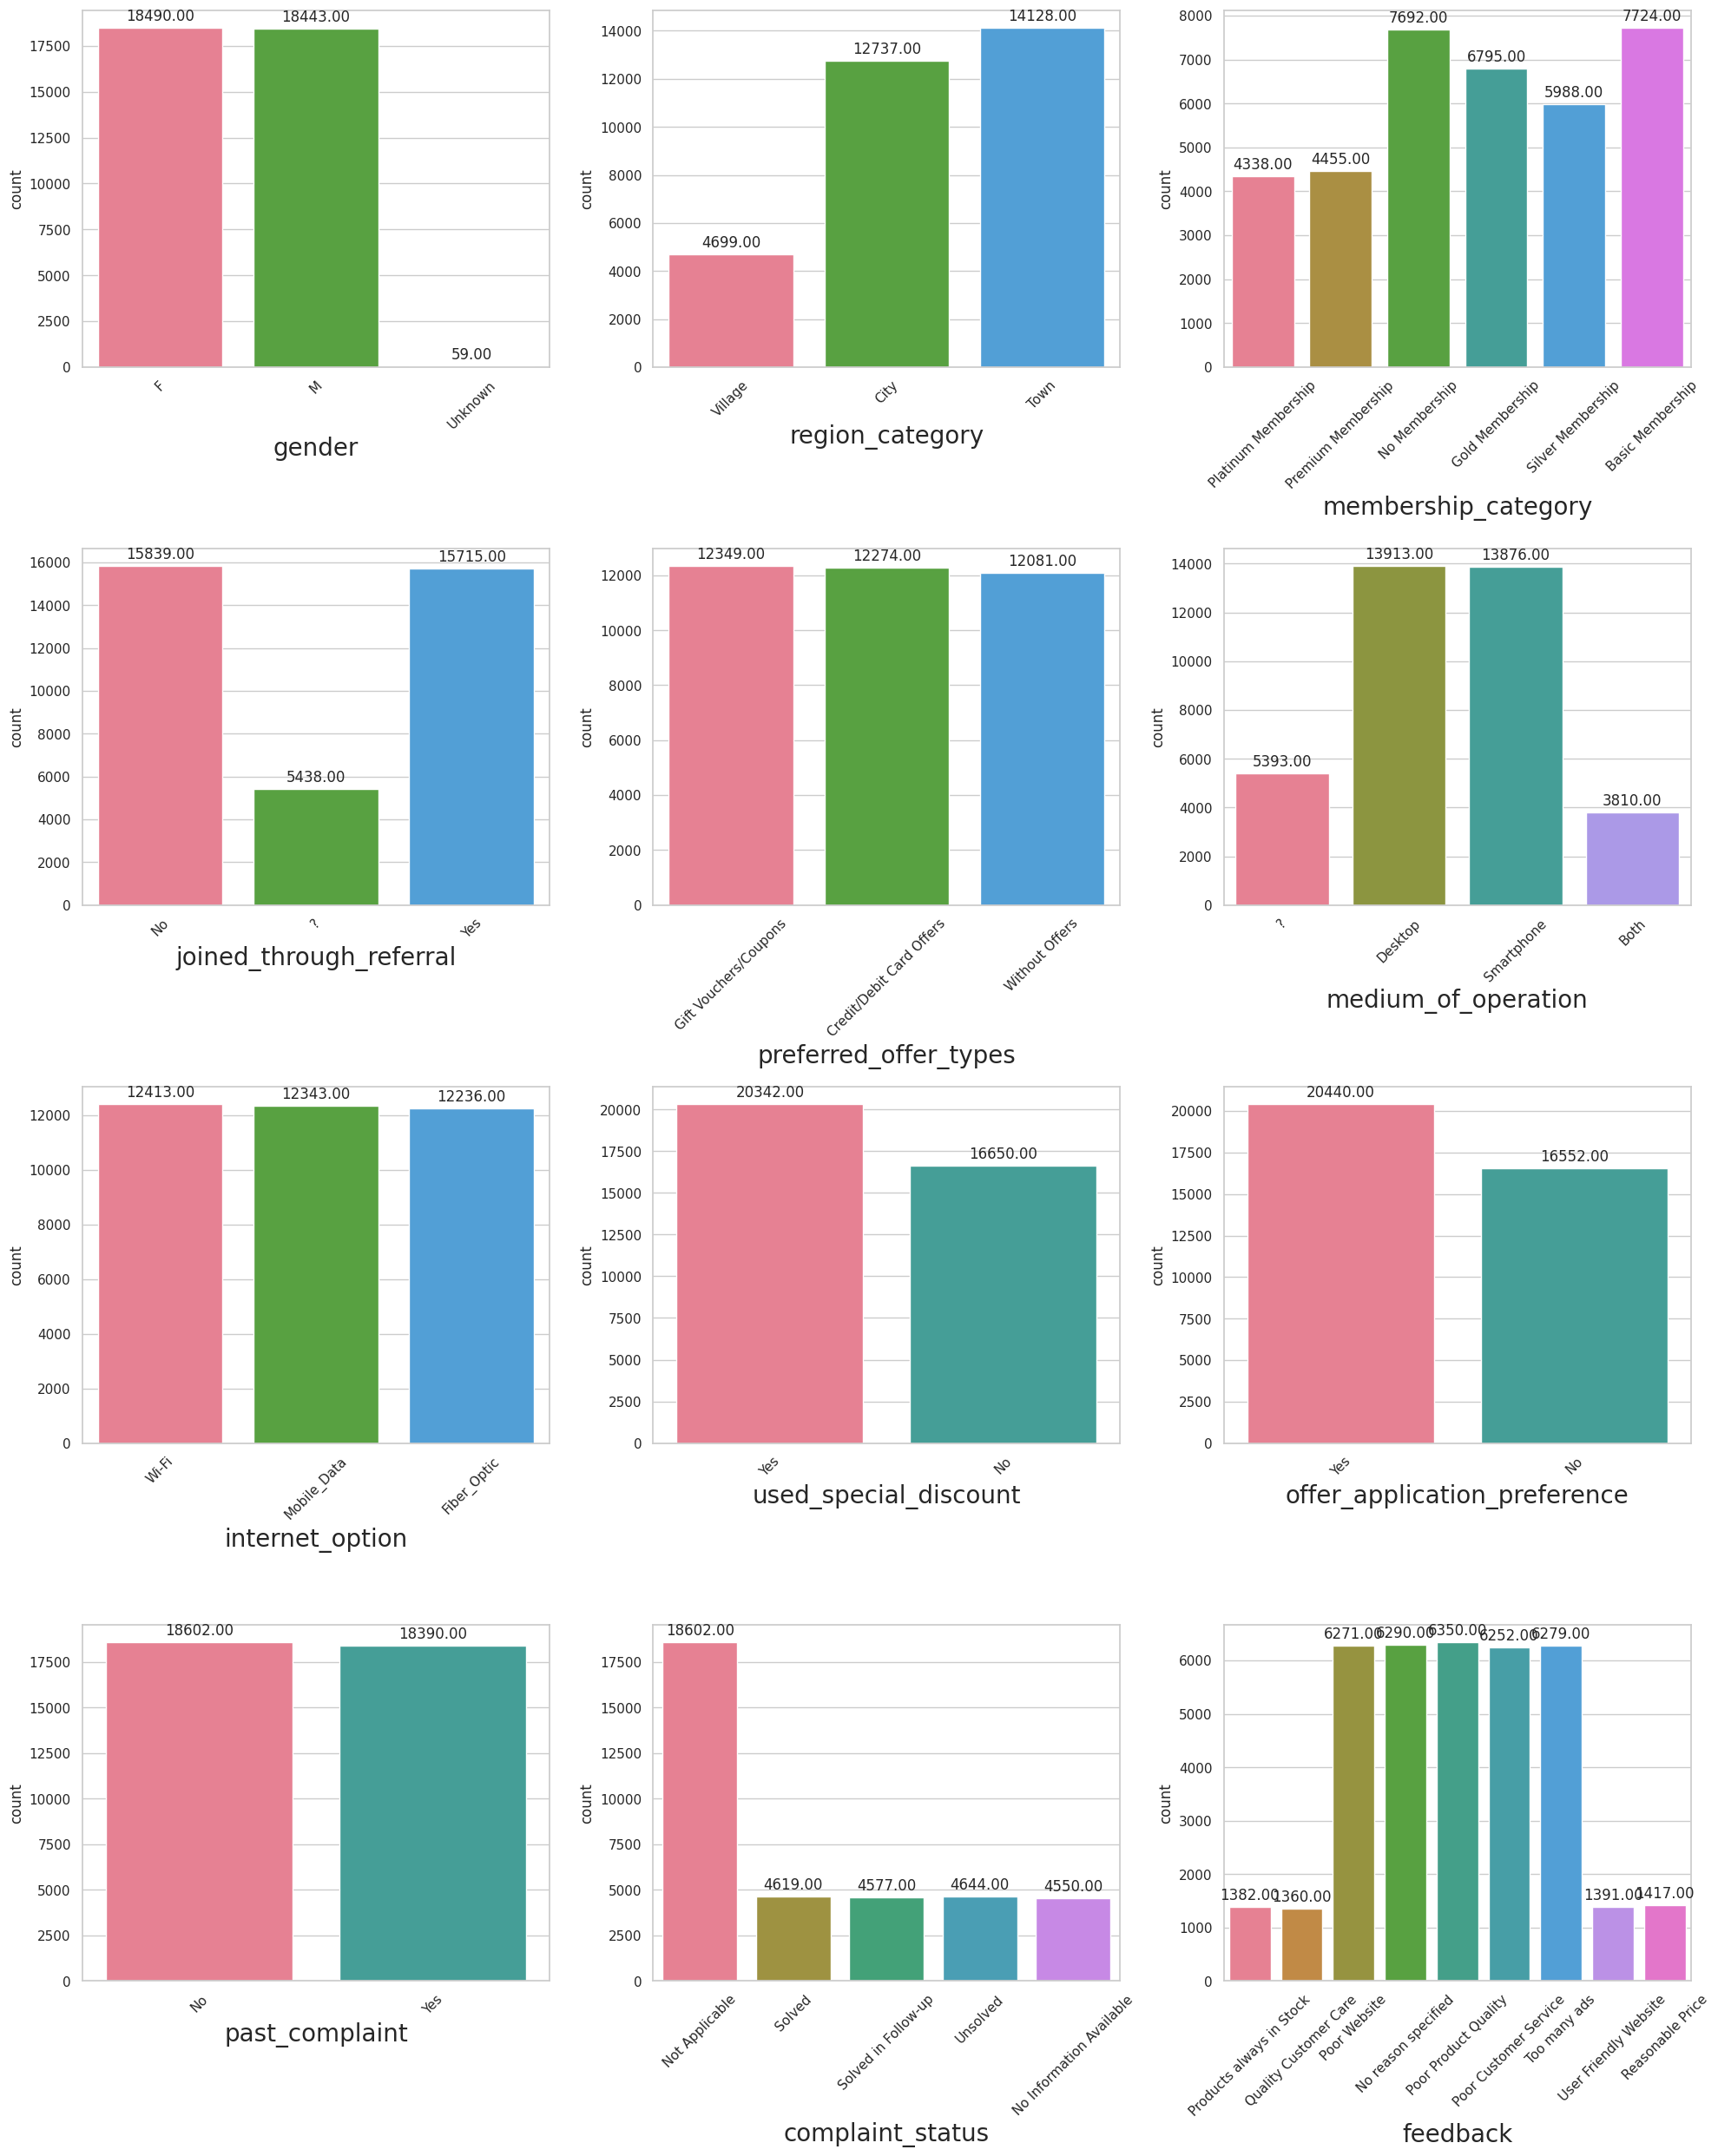

In [14]:
# don't draw columns with too many values
df_cat = df.drop(['last_visit_time','avg_frequency_login_days','joining_date'], axis=1).select_dtypes(include='object')
fig,ax= plt.subplots(nrows=4,ncols=3,figsize=(20, 25)) 

for variable, subplot in zip(df_cat.columns,ax.flatten()):
    z = sns.countplot(x = df_cat[variable],ax=subplot, palette = "husl") 
    z.set_xlabel(variable, fontsize = 20)
    z.set_xticklabels(z.get_xticklabels(),rotation=45)
    for p in z.patches:
        z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

####  Observation:

* The feature gender has unidentified "Unknown" values need to be replaced with NaN
* The feature joined_through_referral has unidentified "?" values need to be replaced with NaN
* The feature medium_of_operation has unidentified "?" values need to be replaced with NaN


### 3.2 Data Preprocessing

* Replace undentified values of the categorical variable 

In [15]:
df["gender"] = df["gender"].replace("Unknown",np.NaN)
df ["joined_through_referral"] = df["joined_through_referral"].replace("?", np.NaN)
df ["medium_of_operation"] = df["medium_of_operation"].replace ("?", np.NaN)

* Replace no valid values of the numeric variable

In [16]:
selected_col = ["days_since_last_login" , "avg_time_spent", "points_in_wallet"]
for i in  (selected_col)  :
    df[i]=df[i].apply(lambda x:x if x>=0 else np.nan)

* Consider columns 'last_visit_time','avg_frequency_login_days','joining_date' and handle invalid data  (these are the columns that we do not plot the countplot to see).

In [17]:
new_df = df.loc[:, ['last_visit_time','avg_frequency_login_days','joining_date']]
new_df.head(10)

,last_visit_time,avg_frequency_login_days,joining_date
0,16:08:02,17.0,2017-08-17
1,12:38:13,10.0,2017-08-28
2,22:53:21,22.0,2016-11-11
3,15:57:50,6.0,2016-10-29
4,15:46:44,16.0,2017-09-12
5,06:46:07,24.0,2016-01-08
6,11:40:04,28.0,2015-03-19
7,07:52:43,24.0,2016-07-12
8,06:50:10,20.0,2016-12-14
9,19:10:16,28.0,2016-11-30


In [18]:
df ["avg_frequency_login_days"].value_counts()

Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [19]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x:x if x!='Error' else -1)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype('float')
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x:x if x>=0 else np.nan)

In [20]:
df.isnull().sum()

age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login           1999
avg_time_spent                  1719
avg_transaction_value              0
avg_frequency_login_days        4205
points_in_wallet                3579
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [21]:
from sklearn.impute import KNNImputer

def preprocessing_data(df):
   
    Missing_cat = df[['gender','preferred_offer_types','region_category','joined_through_referral','medium_of_operation']]
    for i,col in enumerate(Missing_cat):
        df[col].fillna(df[col].mode()[0], inplace=True)
        
    Missing_num_cols = ['points_in_wallet','avg_time_spent','days_since_last_login','avg_frequency_login_days']

    df[Missing_num_cols] = KNNImputer(n_neighbors=3).fit_transform(df[Missing_num_cols])

    
       
    df = df
    return df

In [22]:
df = preprocessing_data(df.copy())

In [23]:
df

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,16:08:02,...,300.630000,53005.25,17.000000,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,...,306.340000,12838.38,10.000000,584.451344,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,...,516.160000,21027.00,22.000000,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,...,53.270000,25239.56,6.000000,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,...,113.130000,24483.66,16.000000,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,Town,Basic Membership,2017-09-21,No,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,...,465.040000,27277.68,6.000000,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,23:18:31,...,267.836667,11069.71,28.000000,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,23,F,Town,Basic Membership,2016-09-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,...,154.940000,38127.56,12.666667,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,...,482.610000,2378.86,20.000000,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [24]:
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [25]:
df[df.duplicated()]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score


### 3.3 Feature Engineering

In [26]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numeric_cols = [ feature for feature in df.columns if df[feature].dtype != "O"]
print(categorical_cols)

['gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [27]:
to_remove = ["joining_date", "last_visit_time"]
categorical_cols = [col for col in categorical_cols if col not in to_remove]


<AxesSubplot: >

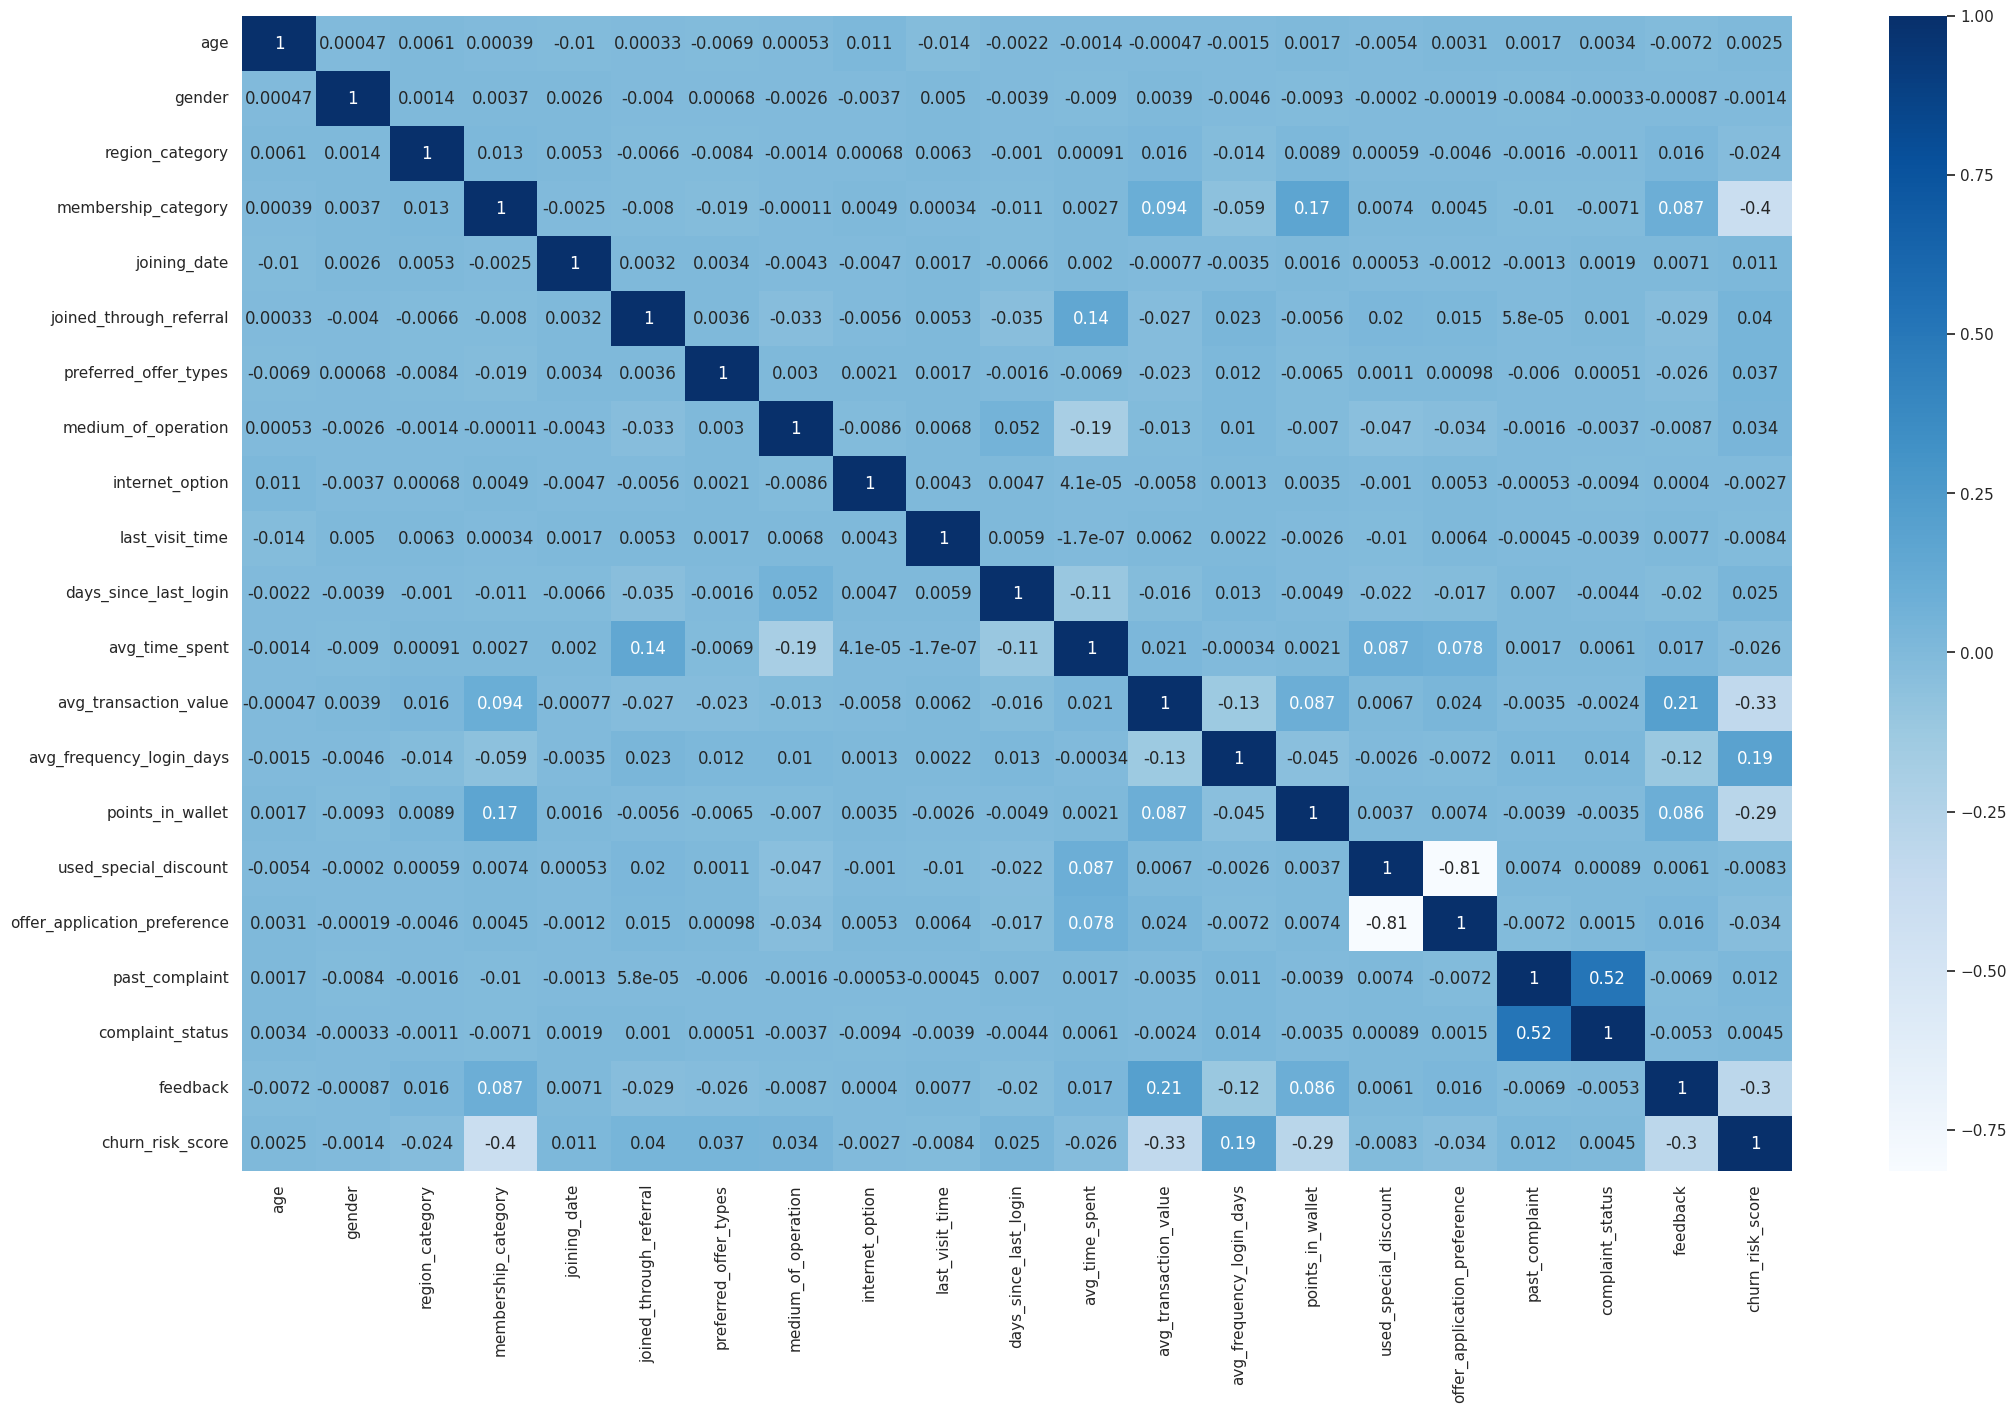

In [28]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
 
    df ["joining_date"] = pd.to_datetime(df ["joining_date"]).astype("int64")
    df ["last_visit_time"] = pd.to_datetime(df ["last_visit_time"]).astype("int64")
    
    for cols in categorical_cols:
        df[cols] = df[cols].astype("category").cat.codes
    # Todo: Normalize data
    df = df
    return df

df = apply_feature_engineering(df)
plt.figure(figsize =(25,15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues") # Show heatmap after normalized data

In [29]:
def prepare_X_y(df):
   
    X = df.drop("churn_risk_score", axis =1)# Select features
    y =df["churn_risk_score"] #Select label
    return X, y

X, y = prepare_X_y(df)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## 4. Apply machine learning model

### 4.1 Train-test split

In [31]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

### 4.2 Build SK-learn model

### DecisionTree model

In [32]:
names = ["Decision Tree","Random Forest", "XGBoost", "CatBoost"]
precision_scores = []
recall_scores = []
f1_scores = []

In [33]:
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


def build_model(X, y):
    scaler = MinMaxScaler()
    clf = DecisionTreeClassifier()
    
    # Input scaler and decisionTree model into pipeline
    model = Pipeline(steps = [("scaler", scaler),("tree",clf)])
    param_grid = {
        'tree__criterion': ["gini", "entropy", "log_loss"],
        'tree__splitter': ["best","random"],
        'tree__max_depth': range(5,20)
        
    }
    grid = GridSearchCV(model, param_grid=param_grid, n_jobs=2)
    
    # fit model with X, y
    grid.fit(X,y)
    return grid




In [34]:
def calculate_performance(y_true, y_pred):
    
    # return error value like accuracy, f1score, ...
    
    print("\nprecision", precision_score(y_true,y_pred,average='weighted') )
    print("recall",recall_score(y_true,y_pred, average='weighted') )
    print("accuracy", accuracy_score (y_true, y_pred) )
    print("F1",f1_score(y_true,y_pred, average='weighted') )

    # Only choose one of them as score for the question 7
    main_score = recall_score(y_true,y_pred,average='weighted')
    print ("Main_score : ",main_score)
    print("-" * 100)
    print("Classification report: \n", classification_report(y_true , y_pred))


model = build_model(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)

pred = model.predict(testX)
calculate_performance(testY, pred)

precision_scores.append(precision_score(testY,pred,average='weighted'))
recall_scores.append(recall_score(testY,pred,average='weighted'))
f1_scores.append(f1_score(testY,pred,average='weighted'))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameter (CV score=0.756):
{'tree__criterion': 'gini', 'tree__max_depth': 8, 'tree__splitter': 'best'}

precision 0.7742225355171574
recall 0.7648330855521016
accuracy 0.7648330855521016
F1 0.7537543460745906
Main_score :  0.7648330855521016
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       772
           1       0.84      0.61      0.71       542
           2       0.88      0.92      0.90      2038
           3       0.77      0.50      0.61      1995
           4       0.68      0.96      0.80      2052

    accuracy                           0.76      7399
   macro avg       0.77      0.73      0.74      7399
weighted avg       0.77      0.76      0.75      7399



### RandomForest model

In [35]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(X,y):
    
    scaler = MinMaxScaler()
    rf = RandomForestClassifier()
    model = Pipeline (steps =[('scaler',scaler),('rf',rf)])
    param_grid = {
        'rf__n_estimators': [50, 100, 120],
        'rf__max_features': ['sqrt', 'log2'],
        'rf__max_depth': [5, 10, 15, 20],
        'rf__criterion': ["gini", "entropy", "log_loss"]
    }
    grid = GridSearchCV(model, param_grid = param_grid, n_jobs=2)
    grid.fit(X,y)
    return grid

model = build_model_rf(trainX,trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)

pred = model.predict(testX)
calculate_performance(testY,pred)

precision_scores.append(precision_score(testY,pred,average='weighted'))
recall_scores.append(recall_score(testY,pred,average='weighted'))
f1_scores.append(f1_score(testY,pred,average='weighted'))

Best parameter (CV score=0.750):
{'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__n_estimators': 120}

precision 0.7413798630040901
recall 0.7448303824841195
accuracy 0.7448303824841195
F1 0.7407643474059977
Main_score :  0.7448303824841195
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.59      0.65       772
           1       0.77      0.69      0.72       542
           2       0.86      0.92      0.89      2038
           3       0.65      0.59      0.62      1995
           4       0.71      0.79      0.75      2052

    accuracy                           0.74      7399
   macro avg       0.74      0.72      0.73      7399
weighted avg       0.74      0.74      0.74      7399



### Xgboost model

In [36]:
from xgboost import XGBClassifier 

def build_model_xgb(X,y):
    scaler = MinMaxScaler()
    xgb = XGBClassifier()
    model = Pipeline(steps =[('scaler',scaler),('xgb',xgb)] )
    
    param_grid = {
        'xgb__max_depth': [5,10, 12, 15, 17],
        'xgb__learning_rate': [0.01, 0.1, 0.5],
        'xgb__n_estimators': [50, 100, 120]
    }
    grid = GridSearchCV (model, param_grid = param_grid, n_jobs = 2)
    
    grid.fit(X,y)
    return grid


model = build_model_xgb(trainX,trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)

pred = model.predict(testX)
calculate_performance(testY,pred)

precision_scores.append(precision_score(testY,pred,average='weighted'))
recall_scores.append(recall_score(testY,pred,average='weighted'))
f1_scores.append(f1_score(testY,pred,average='weighted'))

Best parameter (CV score=0.762):
{'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 50}

precision 0.7837138826107694
recall 0.7687525341262332
accuracy 0.7687525341262332
F1 0.7553924099649799
Main_score :  0.7687525341262332
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       772
           1       0.89      0.62      0.73       542
           2       0.87      0.92      0.89      2038
           3       0.80      0.47      0.59      1995
           4       0.68      0.98      0.80      2052

    accuracy                           0.77      7399
   macro avg       0.79      0.74      0.74      7399
weighted avg       0.78      0.77      0.76      7399



### Catboost model

In [37]:
from catboost import CatBoostClassifier
def build_model_cat(X,y):
    scaler = MinMaxScaler()
    cat = CatBoostClassifier()
    model = Pipeline(steps = [('scaler',scaler),('cat',cat)])
    param_grid = {
        'cat__learning_rate': [0.01, 0.1, 0.5],
        'cat__depth':[10, 12,15, 20],
        'cat__iterations': [50, 100, 120]       
    }
    
    grid = GridSearchCV (model,param_grid = param_grid , n_jobs = 2)
    grid.fit(X,y)
    return grid

model = build_model_cat(trainX,trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)

pred = model.predict(testX)
calculate_performance(testY,pred)

precision_scores.append(precision_score(testY,pred,average='weighted'))
recall_scores.append(recall_score(testY,pred,average='weighted'))
f1_scores.append(f1_score(testY,pred,average='weighted'))


0:	learn: 1.5876040	total: 404ms	remaining: 19.8s
1:	learn: 1.5683060	total: 604ms	remaining: 14.5s
2:	learn: 1.5480163	total: 811ms	remaining: 12.7s
3:	learn: 1.5295857	total: 988ms	remaining: 11.4s
4:	learn: 1.5124665	total: 1.21s	remaining: 10.9s
5:	learn: 1.4954267	total: 1.38s	remaining: 10.1s
6:	learn: 1.4767519	total: 1.58s	remaining: 9.74s
7:	learn: 1.4601830	total: 1.79s	remaining: 9.38s
8:	learn: 1.4450124	total: 1.98s	remaining: 9s
9:	learn: 1.4286237	total: 2.21s	remaining: 8.84s
10:	learn: 1.4120282	total: 2.39s	remaining: 8.47s
11:	learn: 1.3984493	total: 2.6s	remaining: 8.23s
12:	learn: 1.3845061	total: 2.78s	remaining: 7.91s
13:	learn: 1.3706242	total: 2.97s	remaining: 7.63s
14:	learn: 1.3559744	total: 3.13s	remaining: 7.3s
15:	learn: 1.3430638	total: 3.35s	remaining: 7.12s
16:	learn: 1.3296450	total: 3.53s	remaining: 6.86s
17:	learn: 1.3170590	total: 3.71s	remaining: 6.59s
18:	learn: 1.3041195	total: 3.89s	remaining: 6.34s
19:	learn: 1.2912960	total: 4.1s	remaining: 6.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0:	learn: 1.5867625	total: 206ms	remaining: 10.1s
1:	learn: 1.5673913	total: 337ms	remaining: 8.09s
2:	learn: 1.5482703	total: 460ms	remaining: 7.2s
3:	learn: 1.5277637	total: 589ms	remaining: 6.77s
4:	learn: 1.5106078	total: 800ms	remaining: 7.2s
5:	learn: 1.4935571	total: 1s	remaining: 7.34s
6:	learn: 1.4750391	total: 1.19s	remaining: 7.3s
7:	learn: 1.4585528	total: 1.37s	remaining: 7.21s
8:	learn: 1.4431670	total: 1.58s	remaining: 7.21s
9:	learn: 1.4268916	total: 1.8s	remaining: 7.19s
10:	learn: 1.4123883	total: 1.99s	remaining: 7.06s
11:	learn: 1.3971092	total: 2.17s	remaining: 6.87s
12:	learn: 1.3831999	total: 2.32s	remaining: 6.61s
13:	learn: 1.3686090	total: 2.52s	remaining: 6.47s
14:	learn: 1.3539617	total: 2.7s	remaining: 6.3s
15:	learn: 1.3409870	total: 2.9s	remaining: 6.16s
16:	learn: 1.3275906	total: 3.07s	remaining: 5.96s
17:	learn: 1.3152610	total: 3.24s	remaining: 5.76s
18:	learn: 1.3022976	total: 3.41s	remaining: 5.56s
19:	learn: 1.2890473	total: 3.59s	remaining: 5.38s


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


21:	learn: 1.2805396	total: 2m 48s	remaining: 3m 34s
22:	learn: 1.2695839	total: 2m 56s	remaining: 3m 27s
23:	learn: 1.2613435	total: 3m 5s	remaining: 3m 20s
24:	learn: 1.2493378	total: 3m 6s	remaining: 3m 6s
25:	learn: 1.2375543	total: 3m 7s	remaining: 2m 53s
26:	learn: 1.2270546	total: 3m 15s	remaining: 2m 46s
27:	learn: 1.2173801	total: 3m 23s	remaining: 2m 40s
28:	learn: 1.2071155	total: 3m 31s	remaining: 2m 33s
29:	learn: 1.1979870	total: 3m 39s	remaining: 2m 26s
30:	learn: 1.1877069	total: 3m 47s	remaining: 2m 19s
31:	learn: 1.1793225	total: 3m 55s	remaining: 2m 12s
32:	learn: 1.1711961	total: 4m 3s	remaining: 2m 5s
33:	learn: 1.1623219	total: 4m 3s	remaining: 1m 54s
34:	learn: 1.1525506	total: 4m 4s	remaining: 1m 44s
35:	learn: 1.1435418	total: 4m 12s	remaining: 1m 38s
36:	learn: 1.1366667	total: 4m 20s	remaining: 1m 31s
37:	learn: 1.1279579	total: 4m 27s	remaining: 1m 24s
38:	learn: 1.1201945	total: 4m 36s	remaining: 1m 17s
39:	learn: 1.1124044	total: 4m 43s	remaining: 1m 10s
4

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0:	learn: 1.5886737	total: 7.93s	remaining: 6m 28s
1:	learn: 1.5683579	total: 15.5s	remaining: 6m 11s
2:	learn: 1.5493787	total: 23.5s	remaining: 6m 7s
3:	learn: 1.5305374	total: 29.7s	remaining: 5m 41s
4:	learn: 1.5144865	total: 37.5s	remaining: 5m 37s
5:	learn: 1.4968748	total: 38s	remaining: 4m 38s
6:	learn: 1.4792184	total: 46.1s	remaining: 4m 42s
7:	learn: 1.4629858	total: 53.6s	remaining: 4m 41s
8:	learn: 1.4491649	total: 1m 1s	remaining: 4m 39s
9:	learn: 1.4342432	total: 1m 9s	remaining: 4m 37s
10:	learn: 1.4190641	total: 1m 17s	remaining: 4m 35s
11:	learn: 1.4039097	total: 1m 25s	remaining: 4m 31s
12:	learn: 1.3896495	total: 1m 33s	remaining: 4m 26s
13:	learn: 1.3745790	total: 1m 41s	remaining: 4m 22s
14:	learn: 1.3611404	total: 1m 49s	remaining: 4m 16s
15:	learn: 1.3488861	total: 1m 57s	remaining: 4m 9s
16:	learn: 1.3374567	total: 2m 5s	remaining: 4m 3s
17:	learn: 1.3266092	total: 2m 13s	remaining: 3m 57s
18:	learn: 1.3148972	total: 2m 21s	remaining: 3m 51s
19:	learn: 1.302357

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


22:	learn: 1.2694095	total: 2m 55s	remaining: 12m 20s
23:	learn: 1.2601419	total: 3m 3s	remaining: 12m 13s
24:	learn: 1.2507639	total: 3m 11s	remaining: 12m 6s
25:	learn: 1.2423114	total: 3m 18s	remaining: 11m 59s
26:	learn: 1.2323967	total: 3m 26s	remaining: 11m 52s
27:	learn: 1.2220169	total: 3m 34s	remaining: 11m 45s
28:	learn: 1.2119463	total: 3m 42s	remaining: 11m 39s
29:	learn: 1.2036890	total: 3m 50s	remaining: 11m 32s
30:	learn: 1.1933702	total: 3m 58s	remaining: 11m 25s
31:	learn: 1.1836719	total: 4m 6s	remaining: 11m 16s
32:	learn: 1.1752892	total: 4m 14s	remaining: 11m 9s
33:	learn: 1.1677201	total: 4m 22s	remaining: 11m 2s
34:	learn: 1.1580898	total: 4m 29s	remaining: 10m 54s
35:	learn: 1.1498177	total: 4m 37s	remaining: 10m 46s
36:	learn: 1.1414374	total: 4m 45s	remaining: 10m 40s
37:	learn: 1.1329459	total: 4m 53s	remaining: 10m 34s
38:	learn: 1.1240407	total: 5m 1s	remaining: 10m 26s
39:	learn: 1.1159561	total: 5m 9s	remaining: 10m 19s
40:	learn: 1.1073734	total: 5m 18s	

#### Comparison of Different Models with Performance Metrics

In [38]:
scoreDataFrame = pd.DataFrame({'Model':names, 'Precision Score': precision_scores, 'Recall Score': recall_scores,'f1-score': f1_scores})
scoreDataFrame

,Model,Precision Score,Recall Score,f1-score
0,Decision Tree,0.774223,0.764833,0.753754
1,Random Forest,0.741380,0.744830,0.740764
2,XGBoost,0.783714,0.768753,0.755392
3,CatBoost,0.773439,0.762265,0.747040


### 4.3 Handle label imbalances

In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
trainX_resampled, trainY_resampled = sm.fit_resample(trainX,trainY)

model = build_model(trainX_resampled,trainY_resampled)
pred = model.predict(testX)
calculate_performance(testY, pred)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



precision 0.7609832379192566
recall 0.7538856602243547
accuracy 0.7538856602243547
F1 0.742194256097299
Main_score :  0.7538856602243547
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.50      0.58       772
           1       0.69      0.77      0.73       542
           2       0.88      0.91      0.89      2038
           3       0.77      0.50      0.61      1995
           4       0.68      0.94      0.79      2052

    accuracy                           0.75      7399
   macro avg       0.74      0.72      0.72      7399
weighted avg       0.76      0.75      0.74      7399



* We see results that are not even better than if we hadn't dealt with the imbalance.

### 4.4 Feature Selection using Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier(random_state = 0)
model.fit(trainX, trainY)


RandomForestClassifier(random_state=0)

Text(0, 0.5, 'Features')

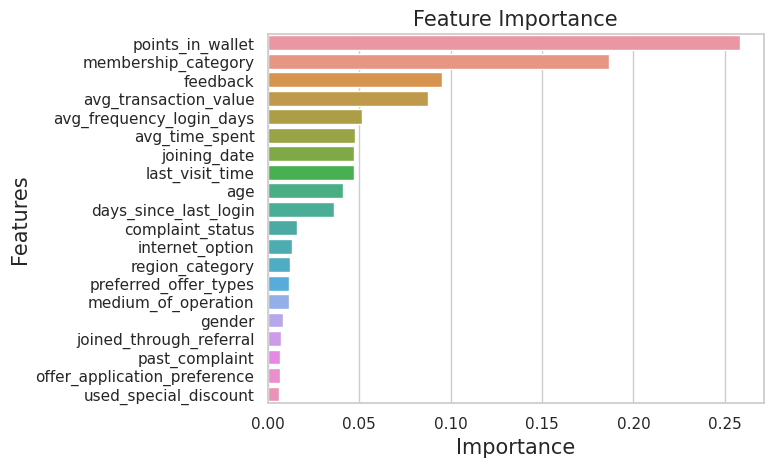

In [41]:
important_features = pd.DataFrame({'Features': trainX.columns, 
                                   'Importance': model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)


In [42]:
X = X.drop(["offer_application_preference","used_special_discount","past_complaint","joined_through_referral","gender"], axis = 1)

In [43]:
trainX,testX, trainY, testY = train_test_split (X,y,train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [44]:
model = build_model(trainX, trainY)
pred = model.predict(testX)
calculate_performance(testY, pred)


precision 0.7718182762421412
recall 0.7628057845654819
accuracy 0.7628057845654819
F1 0.7521177192954006
Main_score :  0.7628057845654819
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       772
           1       0.85      0.61      0.71       542
           2       0.88      0.91      0.89      2038
           3       0.76      0.50      0.60      1995
           4       0.68      0.95      0.80      2052

    accuracy                           0.76      7399
   macro avg       0.77      0.73      0.74      7399
weighted avg       0.77      0.76      0.75      7399



### Draw Confusion Matrix

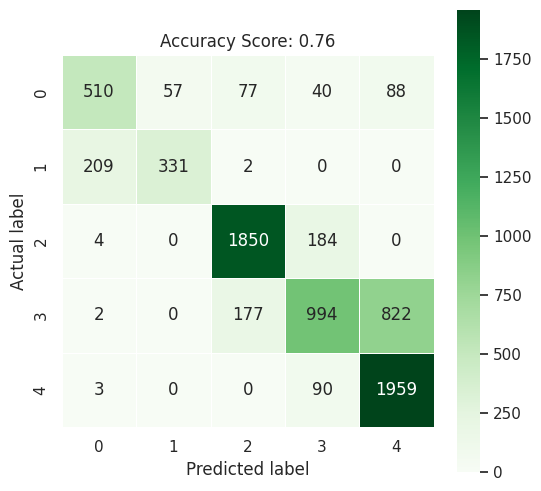

In [45]:

cm = confusion_matrix(testY, pred)
score = model.score(testX, testY)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Greens', fmt='.0f')
plt.title('Accuracy Score: %.2f' % score, size=12)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

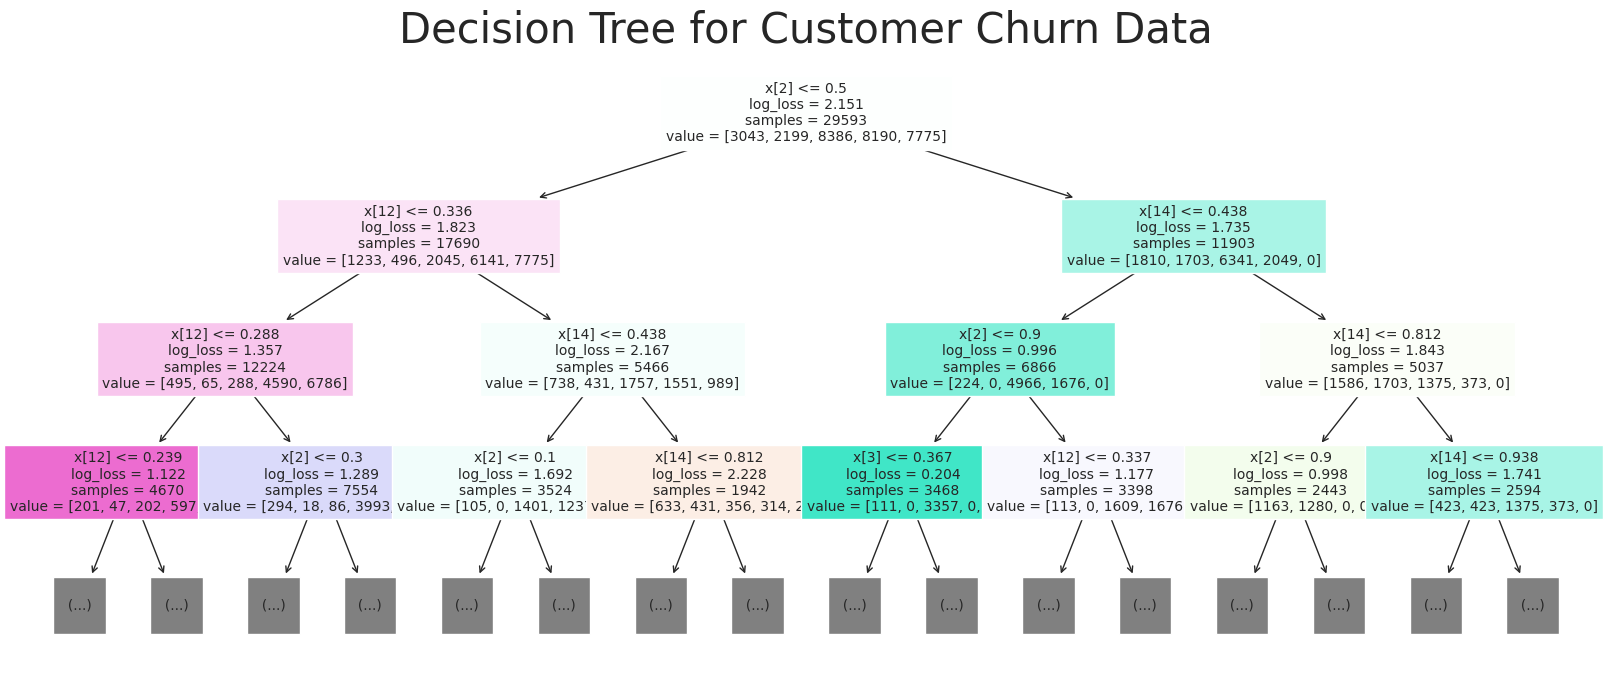

In [46]:
from sklearn import tree
s = plt.figure(figsize=(20,8))
tree.plot_tree(model.best_estimator_[1], max_depth=3, filled=True, fontsize=10,)
plt.title("Decision Tree for Customer Churn Data", fontsize=30)
plt.show() 

### Conclusion

* Recall score is my main metric for this problem.
* Because : Recall in the classification problem of leaving customers is the ratio of correctly predicted leaving customers compared to the total number of actual leaving customers. Since the goal of the problem is to find out which customers are leaving in order to take measures to retain and retain the most customers, we need to maximize recall.

* Decision Tree is the main model I use, because other models give not much better results than this model, but also take a lot of time to run.
* Best parameter (CV score=0.756):
        {'tree__criterion': 'entropy', 'tree__max_depth': 8, 'tree__splitter': 'best'}
